In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pyo
import sys
#sys.path.remove("/home/tamay/Projects/sentiment-analysis/laughter/scripts/wavenet_vocoder")
#sys.path.remove('../../utils')
print(sys.path)
if '../../' not in sys.path: sys.path.insert(1, "../../")
from utils import audio, misc, plots
import pdb


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/

['/home/tamay/Projects/git/laughter-synthesis/synthesizer/full_audio', '/opt/anaconda3/envs/aip37/lib/python37.zip', '/opt/anaconda3/envs/aip37/lib/python3.7', '/opt/anaconda3/envs/aip37/lib/python3.7/lib-dynload', '', '/home/tamay/.local/lib/python3.7/site-packages', '/opt/anaconda3/envs/aip37/lib/python3.7/site-packages', '/home/tamay/Projects/sentiment-analysis/laughter/scripts/wavenet_vocoder', '/opt/anaconda3/envs/aip37/lib/python3.7/site-packages/IPython/extensions', '/home/tamay/.ipython']


/opt/anaconda3/envs/aip37/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [210]:
out = audio.spawnWhistles(44100, can_radius=200, pea_radius=5, bump_radius=150, fipple_freq_mod=.35, fipple_gain_mod=.35, noise_gain=.2, base_freq=2800, sine_rate=2500, pole=.95, norm_can_loss=.97)

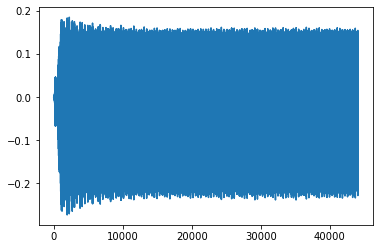

In [213]:
env = audio.adsr(np.linspace(0, 1, 44100), 1, .2, .1, .8, .1)
display(audio.playSingleAudio(out, 44100))
display(audio.playSingleAudio(out * env, 44100))
display(audio.playSingleAudio(audio.changePitch(out, 44100, -4), 44100))
display(audio.playSingleAudio(audio.changePitch(out, 44100, -1), 44100))
display(audio.playSingleAudio(audio.changePitch(out, 44100, 1), 44100))
display(audio.playSingleAudio(audio.changePitch(out, 44100, 3), 44100))
plt.plot(out)

In [72]:
# no persons, fs, len in secs, envelope, 
out = audio.spawnClaps(100, 44100, 10)

In [77]:
# Envelope for discrete events, sharp attack, long release.
env = audio.adsr(np.linspace(0, 1, 44100), 1, .2, .1, .8, .1)

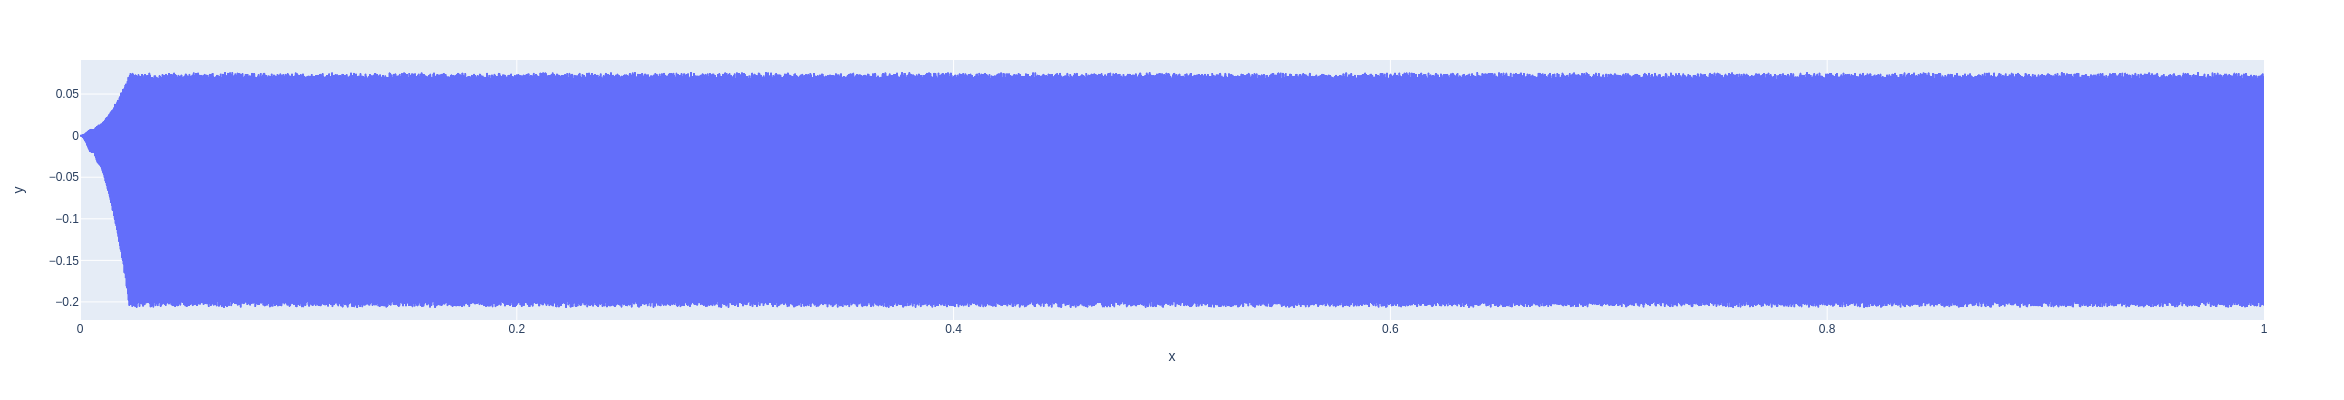

In [78]:
import plotly.express as px

x = np.linspace(0, 1, 44100)

 
fig = px.line(x=x, y=out, width=800, height=400)
#fig = px.line(x=x, y=env*out, width=800, height=400)
fig.show()

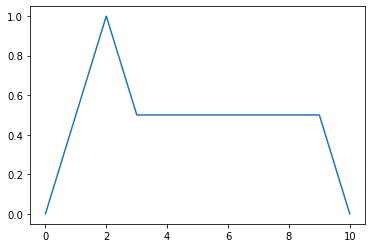

In [34]:
np.random.seed(9999)
x = np.linspace(0, 10, 1000)

def adsr(x, t, a, d, s_val, r):
    '''
    x input vector
    t signal total len
    a attack duration
    d decay duration
    s_val sustain level
    r release duration
    '''
    m0 = (1/a)
    b0 = 0
    m1 = (s_val-1)/d
    b1 = 1-a*m1
    
    s = t-r
    m2 = s_val/(s-t)
    b2 = - t * m2
    y = []
    for i in x:
        if i < a: y.append(m0*i)
        if (i >= a) & (i < a+d):  y.append(m1*i+b1)
        if (i >= a+d) & (i < s):  y.append(s_val)
        if i > s:  y.append(m2*i+b2)
    return np.asarray(y)

plt.plot(x, adsr(x, 10, 2, 1, 0.5, 1))


In [37]:
noise = np.random.random(1000)

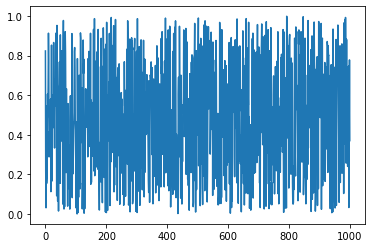

In [38]:
plt.plot(noise)

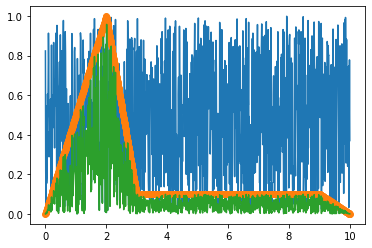

In [47]:
plt.plot(x, noise) 
env = audio.adsr(x, 10, 2, 1, .1, 1)
plt.plot(x, env, 'o')
plt.plot(x, noise * env)
